<a href="https://colab.research.google.com/github/shinyarah/core_module2_week3/blob/main/4thipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DEFINING THE QUESTION

## a) Specifying the question
As a data analyst for Nairobi Hospital

build models to determine whether or not the symptoms presented by patients indicate hypothyroid



## b) Defining the metric for success
This will be achieved when we get the best performing kernel between linear, polynomial and rbf

 
## c) Understanding the context
1. Using either random forests, ada boosted trees or gradient boosted trees, document the setting up of parameteres to identify which two models that determine the features that are most impactful in influencing the prediction
2. Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.


## d) Experimental design
1. Data cleaning
2. Perform EDA
3. Build the random forest classifier
4. Build the gradient booster classifier
5. Build the linear function
6. Build the polynomial function
7. Build the rbf model


In [1]:
#importing libraries
import pandas as pd
import numpy as np

#loading dataset
forth=pd.read_csv('/content/hypothyroid (1).csv')
forth.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [2]:
forth.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [3]:
forth.shape

(3163, 26)

In [4]:
forth.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

#DATA CLEANING

In [5]:
#looking for missing values
forth.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [6]:
#looking for duplicates
forth.duplicated().sum()

77

In [7]:
#dropping the duplicates
forth.drop_duplicates(subset=None, keep='first', inplace=True)
forth.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [8]:
forth.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [9]:
forth.age.value_counts()

?     438
59     63
62     61
60     60
72     59
     ... 
8       1
97      1
98      1
5       1
7       1
Name: age, Length: 93, dtype: int64

i noticed that some columns had '?' in their entries. i'm going to try and find them and figure out if i should drop or fill in the value

In [10]:
#converting the '?' to missing values
forth=forth.replace('?',np.nan)

In [11]:
forth.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

In [12]:
#Converting data types 
forth[['age','TSH',	'T3', 'TT4','T4U', 'FTI', 'TBG']]=forth[['age','TSH',	'T3',	'TT4','T4U','FTI','TBG']].astype(float)

In [13]:
#filling the '?' in age with the mean age
forth['age'].fillna(forth['age'].mean(),inplace=True)

In [14]:
#filling all the unmeasured values with 0.0
forth['TSH'].fillna(0.0,inplace=True)
forth['T3'].fillna(0.0,inplace=True)
forth['TT4'].fillna(0.0,inplace=True)
forth['T4U'].fillna(0.0,inplace=True)
forth['FTI'].fillna(0.0,inplace=True)
forth['TBG'].fillna(0.0,inplace=True)

In [15]:
#deleting missing values in 'sex'
forth.dropna(inplace=True)

In [16]:
#encoding the columns from objects
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
forth['sex']=labelencoder.fit_transform(forth['sex'])
forth['on_thyroxine']=labelencoder.fit_transform(forth['on_thyroxine'])
forth['query_on_thyroxine']=labelencoder.fit_transform(forth['query_on_thyroxine'])
forth['on_antithyroid_medication']=labelencoder.fit_transform(forth['on_antithyroid_medication'])
forth['thyroid_surgery']=labelencoder.fit_transform(forth['thyroid_surgery'])
forth['query_hypothyroid']=labelencoder.fit_transform(forth['query_hypothyroid'])
forth['query_hyperthyroid']=labelencoder.fit_transform(forth['query_hyperthyroid'])
forth['pregnant']=labelencoder.fit_transform(forth['pregnant'])
forth['sick']=labelencoder.fit_transform(forth['sick'])
forth['tumor']=labelencoder.fit_transform(forth['tumor'])
forth['lithium']=labelencoder.fit_transform(forth['lithium'])
forth['goitre']=labelencoder.fit_transform(forth['goitre'])
forth['TSH_measured']=labelencoder.fit_transform(forth['TSH_measured'])
forth['T3_measured']=labelencoder.fit_transform(forth['T3_measured'])
forth['TT4_measured']=labelencoder.fit_transform(forth['TT4_measured'])
forth['T4U_measured']=labelencoder.fit_transform(forth['T4U_measured'])
forth['FTI_measured']=labelencoder.fit_transform(forth['FTI_measured'])
forth['TBG_measured']=labelencoder.fit_transform(forth['TBG_measured'])

In [17]:
forth.dtypes
#the dataset looks good to work on

status                        object
age                          float64
sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
TBG                          float64
dtype: object

#EDA

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb

###Univariate Analysis

In [19]:
#univariate analysis for status
forth_frequency = pd.DataFrame(forth, columns=['status'])
forth_frequency

,status
0,hypothyroid
1,hypothyroid
2,hypothyroid
3,hypothyroid
4,hypothyroid
...,...
3158,negative
3159,negative
3160,negative
3161,negative


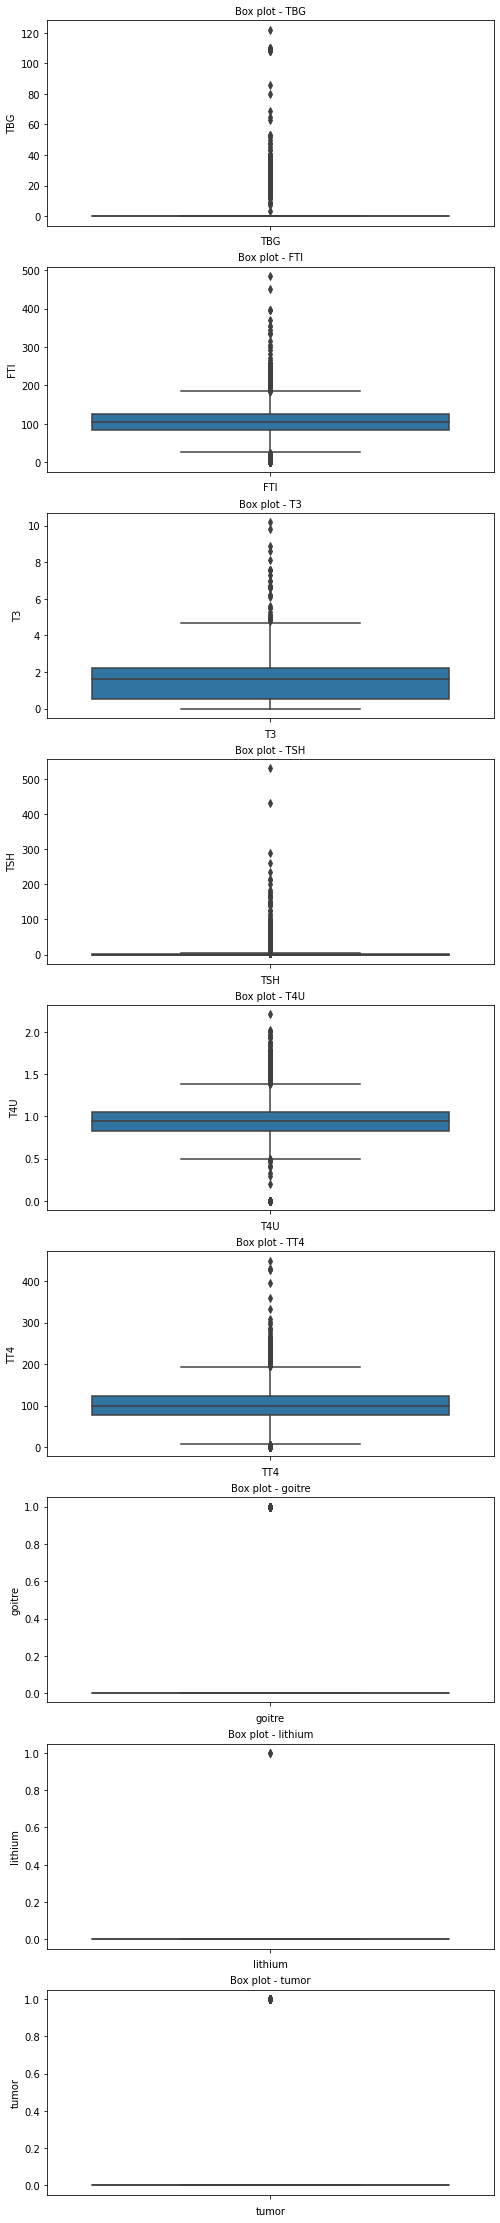

In [20]:
#boxplots to find outliers
#Plotting the box plot for columns with outliers

col_names = ['TBG','FTI','T3', 'TSH', 'T4U', 'TT4', 'goitre', 'lithium', 'tumor']

fig,ax = plt.subplots(len(col_names),figsize=(8,40))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=forth[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

In [21]:
print(f'Min: {forth.age.min()}')
print(f'Q1: {forth.age.quantile(.25)}')
print(f'Q2: {forth.age.quantile(.50)}')
print(f'Q3: {forth.age.quantile(.75)}')
print(f'Max: {forth.age.max()}')
print('*'*15)

print(f'Mean: {forth.age.mean()}')
print(f'Median: {forth.age.median()}')
print(f'Mode: {forth.age.mode().values[0]}')
print('*'*15)

print(f'Skew: {forth.age.skew()}')
print(f'Kurtosis: {forth.age.kurt()}')

Min: 1.0
Q1: 37.0
Q2: 51.112537764350456
Q3: 65.0
Max: 98.0
***************
Mean: 51.171254373044064
Median: 51.112537764350456
Mode: 51.112537764350456
***************
Skew: -0.1844382878997718
Kurtosis: -0.6636458326412424


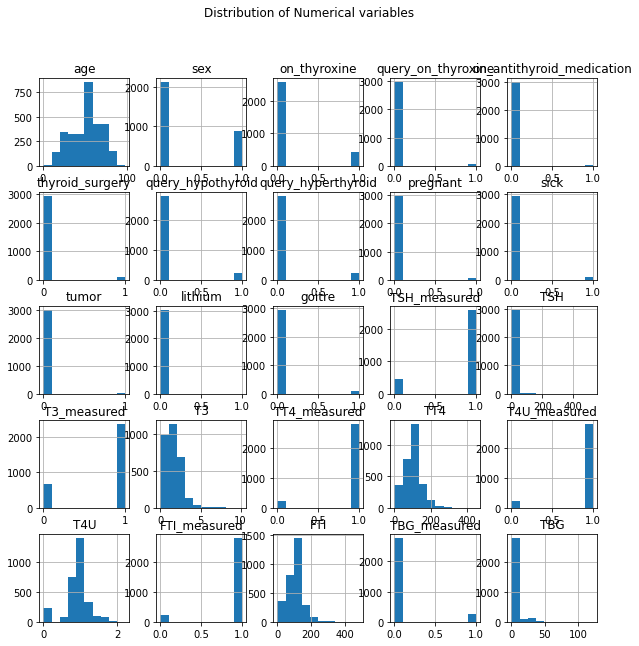

In [22]:
##Checking for data distribution
forth.hist(bins=10, figsize=(10,10))
plt.suptitle('Distribution of Numerical variables')
plt.show()

In [23]:
forth.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

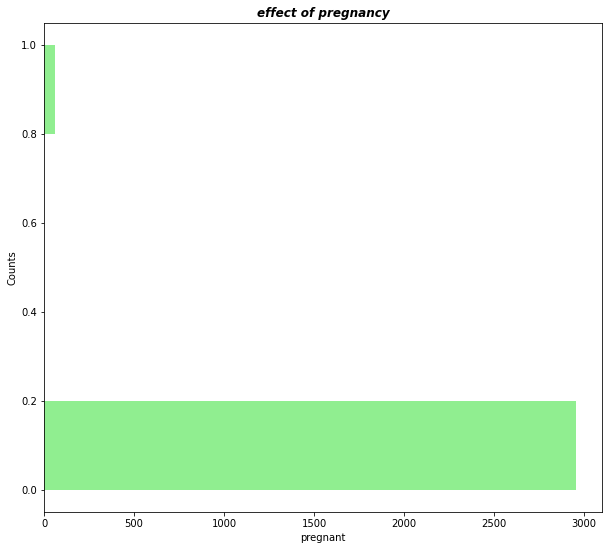

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize=(10,9))
plt.hist(forth['pregnant'], bins=5, histtype='bar', orientation='horizontal', color='lightgreen')
plt.title('effect of pregnancy', fontweight='bold', style='italic')
plt.xlabel('pregnant')
plt.ylabel('Counts')
plt.show()

plt.savefig('effect of pregnancy.png')

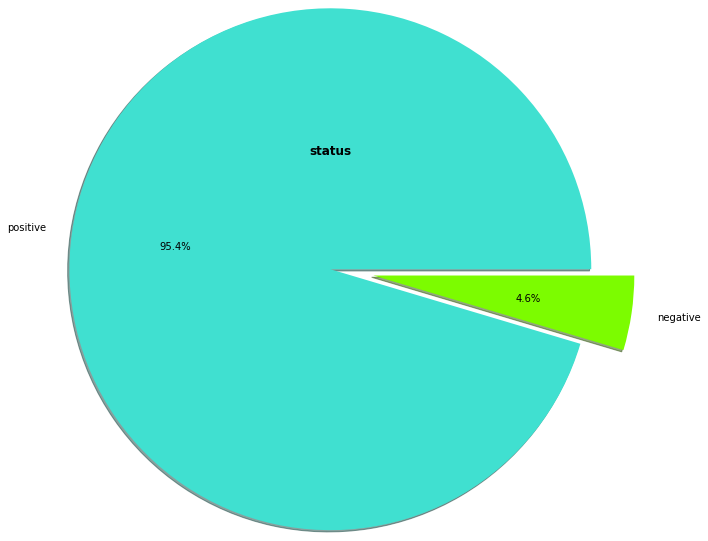

In [26]:
plt.pie(forth['status'].value_counts().values, shadow=True, 
        colors=['turquoise', 'lawngreen'], autopct='%1.1f%%',
        labels=['positive', 'negative'], radius= 3, explode=[0, 0.5])


plt.title('status', fontweight='bold')

plt.savefig('hypothyroid status.png')
plt.show()

###Bivariate Analysis

In [27]:
forth.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [29]:
forth.groupby('sex')[['TT4']].sum()

,TT4
sex,
0,217645.1
1,83127.8


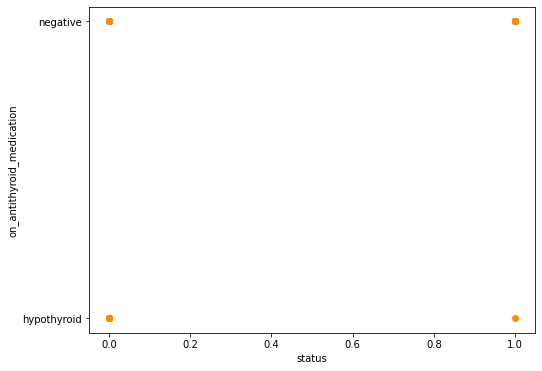

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(forth['on_antithyroid_medication'],forth['status'],color='darkorange')
plt.savefig('relatinship_b2n_medication_and_status.png')
plt.xlabel('status')
plt.ylabel('on_antithyroid_medication')
plt.show()

#the output for the scatter plot shows no relationship

In [ ]:
correlation = forth.corr()

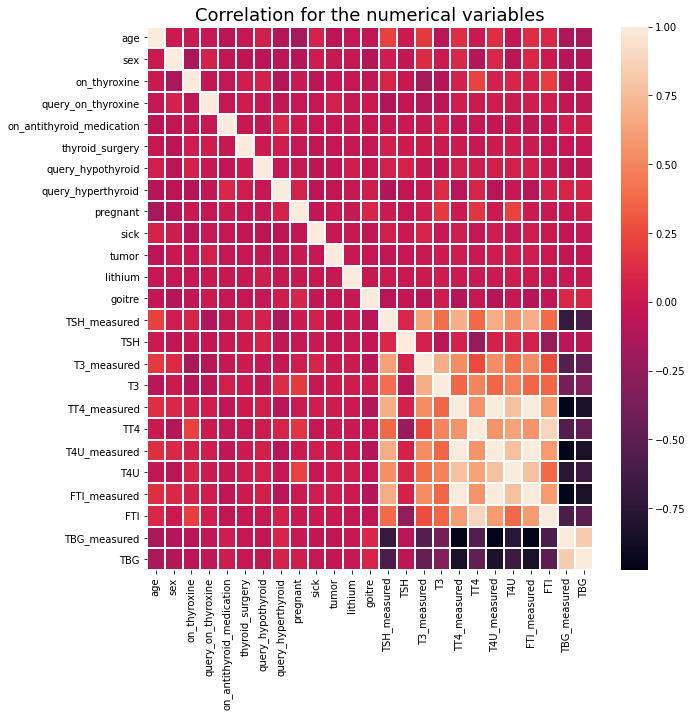

In [ ]:
#correlation heatmap
plt.figure(figsize=(10,10))
sb.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,linewidth=1.0,annot=False)
plt.title('Correlation for the numerical variables',fontsize=18)
plt.show()

###Linear Discriminant Analysis

In [32]:
# Dividing the dataset into features and corresponding labels after which the resultants will be divided into training and test sets
X = forth.iloc[:, 1:26].values
y = forth.iloc[:, 0].values

In [33]:
# Dividing data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
# Feature scaling
 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
# Peforming LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Finally we execute the fit and transform methods to actually retrieve the linear discriminants.


In [36]:
# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [37]:
# Evaluating the Performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[ 19   6]
 [  8 570]]
Accuracy0.9767827529021559


#Decision Trees


##Random Forest Classifier

In [38]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
forth['status']=en.fit_transform(forth['status'])

In [39]:
forth.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.00000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000
mean,0.953867,51.171254,0.296714,0.146366,0.018254,0.01394,0.033521,0.077663,0.077000,0.019914,0.031862,0.013276,0.000664,0.031530,0.852970,4.966160,0.778294,1.498141,0.922005,99.825058,0.922337,0.908238,0.922668,103.085264,0.081646,2.521274
std,0.209809,18.018965,0.456885,0.353531,0.133892,0.11726,0.180024,0.267686,0.266635,0.139727,0.175662,0.114472,0.025760,0.174774,0.354194,22.519266,0.415463,1.168657,0.268209,51.444135,0.267686,0.336617,0.267161,50.531162,0.273870,10.030384
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,37.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000,1.000000,77.000000,1.000000,0.830000,1.000000,85.000000,0.000000,0.000000
50%,1.000000,51.112538,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.400000,1.000000,1.600000,1.000000,100.000000,1.000000,0.950000,1.000000,104.000000,0.000000,0.000000
75%,1.000000,65.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.700000,1.000000,2.200000,1.000000,124.000000,1.000000,1.050000,1.000000,125.000000,0.000000,0.000000
max,1.000000,98.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.000000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,485.000000,1.000000,122.000000


In [41]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone has thyroid, so let's use that column as our Y 
y1 = forth['status'].values


test_features = forth.columns.to_list()
test_features.remove('status')

# We should be able to use all the other features
X1 = forth[test_features].values

# Train using 70% of the data.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestClassifier
 
forest = RandomForestClassifier(n_estimators=100)

# The random_state variable is here to guarantee that we all see the same numbers.

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X1_train, y1_train)

# Predict based on the model we've trained
y1_pred = forest.predict(X1_test)


from sklearn import metrics
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y1_test, y1_pred))

Precision: 0.9908571428571429


In [42]:
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y1_test, y1_pred))

Recall: 0.997698504027618


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


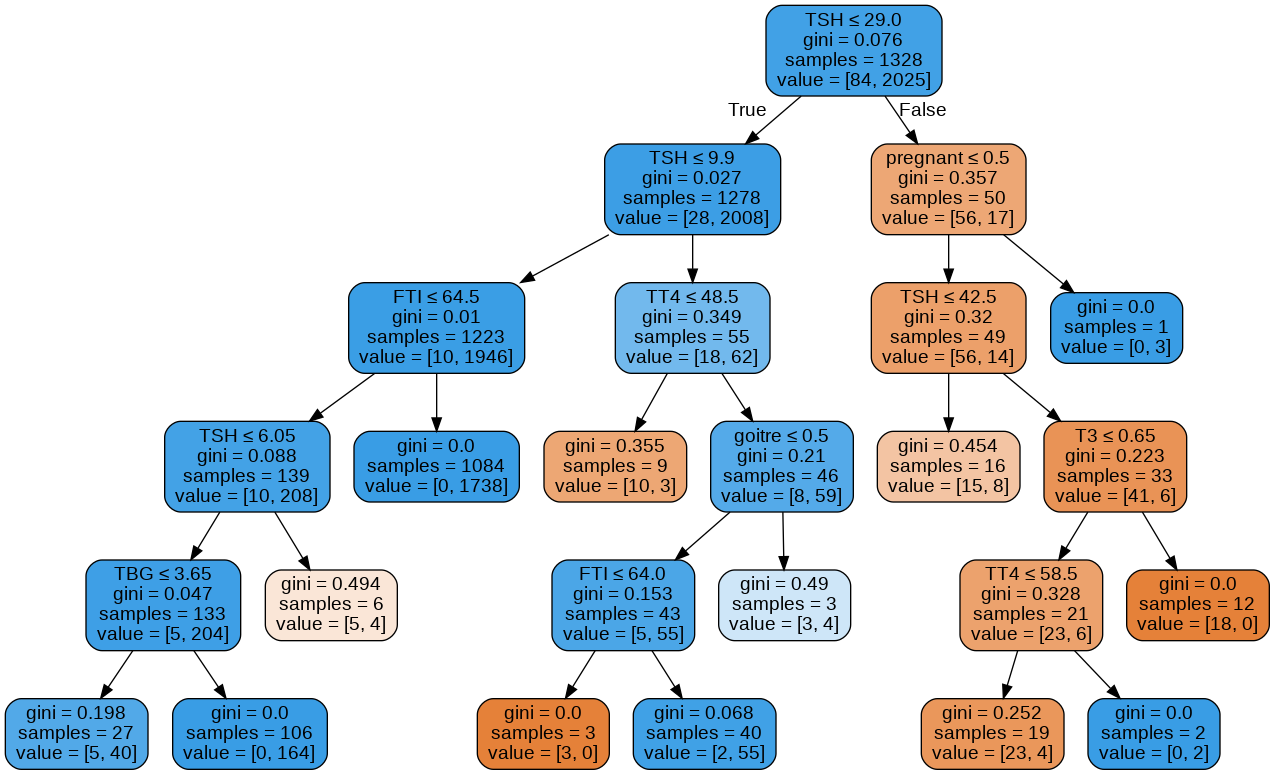

In [43]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

# here we pick a specific tree from the forest
tree = forest.estimators_[40]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('thyroid_forest.png')
Image(graph.create_png())

In [44]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]


#print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
#print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: TSH                  Importance: 0.79
Variable: TT4                  Importance: 0.1
Variable: FTI                  Importance: 0.05
Variable: pregnant             Importance: 0.03
Variable: goitre               Importance: 0.01
Variable: T3                   Importance: 0.01
Variable: TBG                  Importance: 0.01
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: TSH_measured         Importance: 0.0
Variable: T3_measured          Importance: 0.0
Variable: TT4_measured         Importance: 0.0
Va

only 7 variables are necessary for our prediction: TSH, TT4, FTI, pregnant, goitre, T3, TBG

In [45]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9767827529021559


In [46]:
#hyperparameter tuning

from sklearn.model_selection import GridSearchCV
#min_samples_split = 10, max_depth=3
parameters={'min_samples_split': np.linspace(0.1, 1, 10, endpoint=True),
            'max_depth' : np.arange(1, 10, 1)}
forest_grid = GridSearchCV(estimator=forest,param_grid=parameters,n_jobs=1,refit=True,cv=10 )
forest_grid = forest_grid.fit(X1_train, y1_train)
print("Random forest best parameters:", forest_grid.best_params_)

Random forest best parameters: {'max_depth': 6, 'min_samples_split': 0.1}


In [47]:
#Train the model using the new parameters
forest_grid= RandomForestClassifier(n_estimators=300,min_samples_split = 0.1, max_depth=6)
forest_grid = forest_grid.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_grid = forest_grid.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_grid))

Accuracy: 0.9734660033167496


The Random Forest Classifier model has a Precision: 0.9908571428571429, an at Accuracy: 0.9734660033167496 making it a good model for this project

##Gradient Booster Classifier

In [48]:
X = forth.iloc[:, 1:26].values
y = forth.iloc[:, 0].values

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 300

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X)

y_pred_gbr

array(['hypothyroid', 'hypothyroid', 'hypothyroid', ..., 'negative',
       'negative', 'negative'], dtype=object)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbr))

#SVM

##Linear Function

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
forth.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,0.0
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,0.0
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,0.0


In [ ]:
# Let's now build the svm model 
forth = SVC(kernel = 'linear')
# Train the model using the training set
forth.fit(X_train,y_train)

# Predict the response for the test set
y_pred = forth.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy




0.9811946902654868

In [ ]:
# For further evaluation, the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 26,   9],
       [  8, 861]])

with an accuracy of 0.9811946902654868 and 26/861 correctly predicted output, this model has done a good job

##Polynomial Function

In [ ]:
# Implementing the Solution
# 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import confusion_matrix,accuracy_score
#model = SVC(kernel="poly", degree=3, coef0=1, C=5)

In [ ]:
# Building the model 
polyclassifier = SVC(kernel='poly')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#fitting the model
polyclassifier.fit(X_train, y_train)
y_pred = polyclassifier.predict(X_test)

In [ ]:
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9657079646017699
[[  6  29]
 [  2 867]]


with an accuracy of 0.9657079646017699, the polynomial function has done good in prediction for the question above

##RBF 

In [ ]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9834070796460177
[[ 24  11]
 [  4 865]]


with an accuracy of 0.9834070796460177, RBF is our best model for this project. This is the function that we are going to hyperparameter tune and compare the outcomes

####Hyperparameter Tuning

In [ ]:
#hyperparameter tuning
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [ ]:
# making prediction
y_pred = rbfclassifier.predict(X_test)
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9834070796460177
[[ 24  11]
 [  4 865]]


#CONCLUSION
There is no difference between the model before and after hyperparameter tuning. This implies that we had already used the best parameters within the first trial. Chances of overfitting are low, making this a very good function to work with on our dataset

The question asked was appropriate for the dataset provided. Any additional information was not required for this project